THESE IS AN ANALYSIS ON THE SALES OF GAMES IN 2016

please take note of everything done here,its a quick level of EDA.

and the model involved is the decision tree,just take a look and enjoy the quick ride

there are also some other models that are actually capable of giving accurate predictions,but honestly decision tree 

is actually easier to understand

1.We import the neccesary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2.Read in the csv files

In [5]:
games = pd.read_csv("games.csv.zip")
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


3.Checking the general statistics

In [6]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


4.Information about the data

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


5.The pearson method is showing the correlation between the games

In [9]:
games.corr(method = "pearson")

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


5b.Showing the correlation matrix

As we can clearly see ,from the heat map below, NA_Sales is the highest correlation but we cant deny EU_Sales and the Other_Sales that are stongly correlated too.

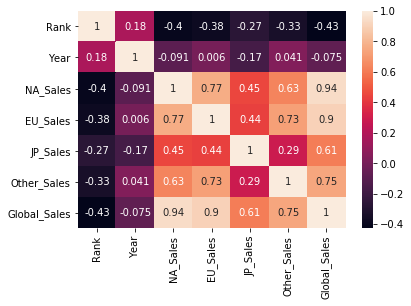

In [8]:

sns.heatmap(games.corr(),cbar=True,annot=True)

6.These is a pairplot for each of the game sales

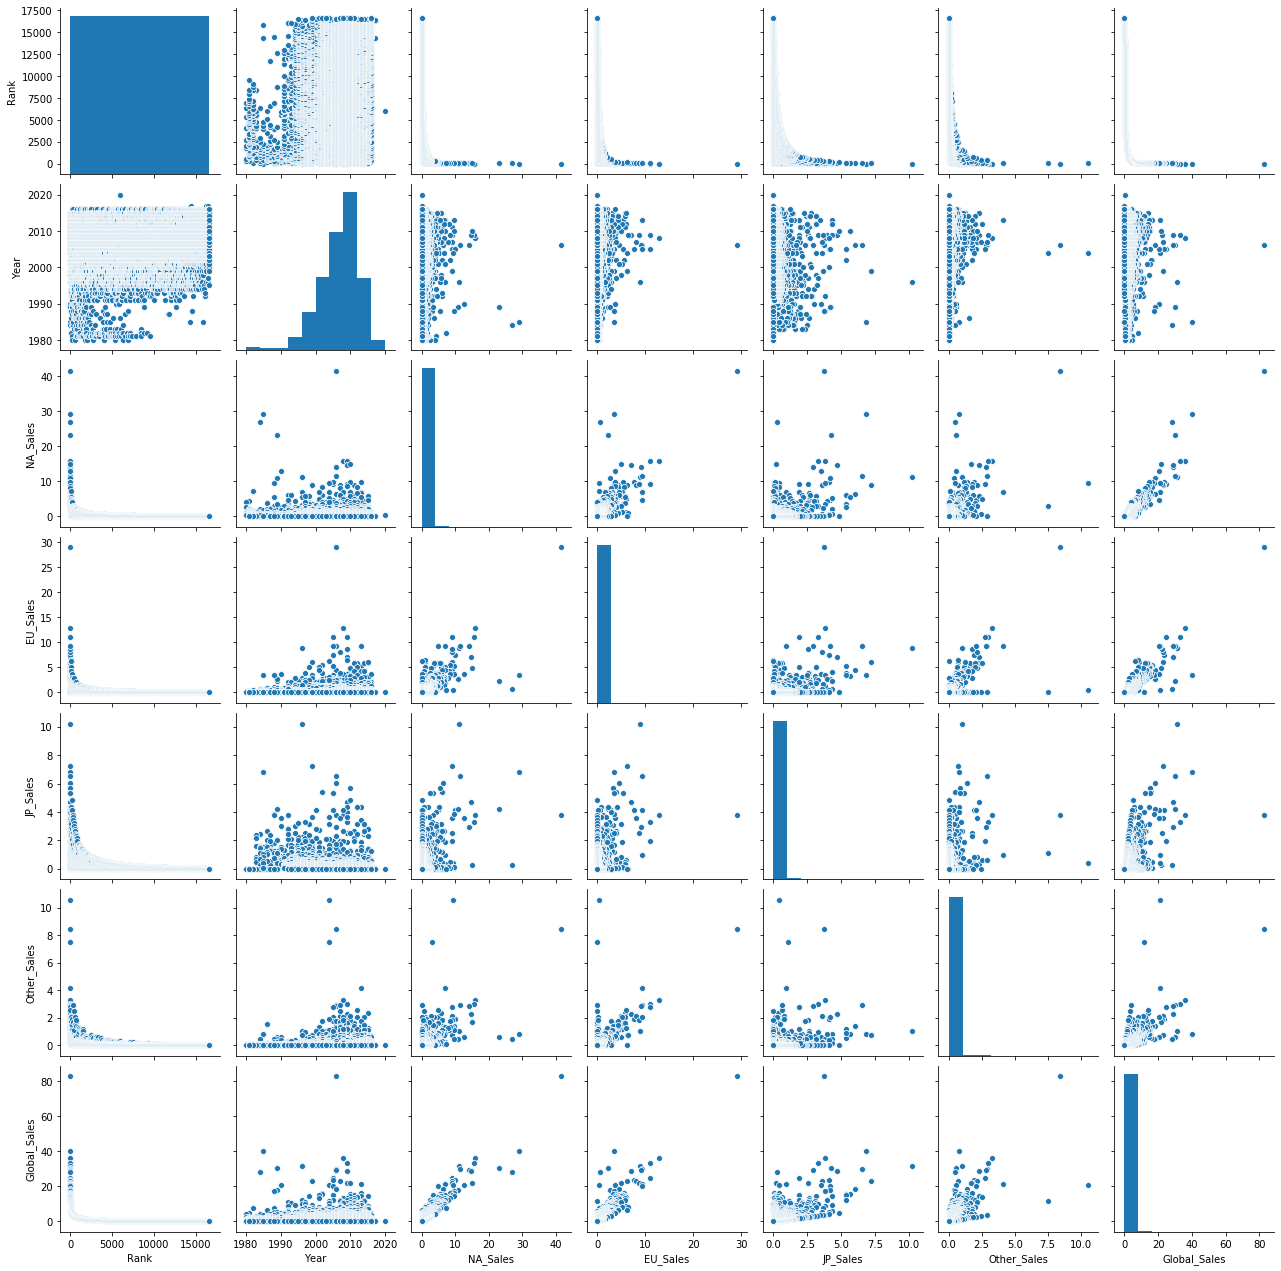

In [10]:
sns.pairplot(games)

7.This is showing us the maximum year value

In [12]:
Year_data = games['Year']
print('max Year value: ', Year_data.min())

max Year value:  1980.0


8.Getting to know if there is any missing value,and there are two columns with missing values

namely;year and publisher

In [13]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
cop = games.copy()

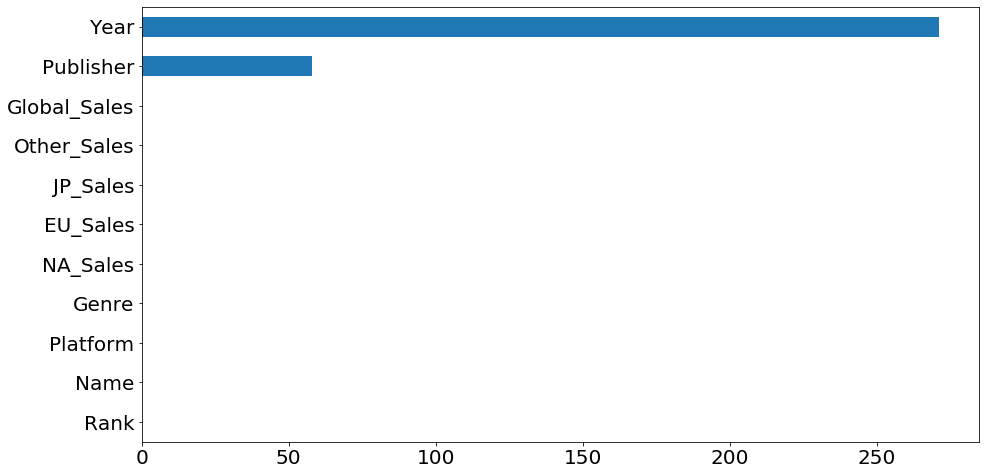

In [11]:
#Quick peak into NA columns#

fig = plt.figure(figsize=(15, 8))
cop.isna().sum().sort_values(ascending=True).plot(kind='barh', fontsize=20)


9.This function dropna,is what we use  to clear the na values

and thats the action that was done here

In [13]:
 gamesD = games.dropna()
gamesD.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


10.We did a groupby to get the  sum  of the best game genre for each of the global sales 

In [18]:
best_genre = gamesD[['Genre', 'Global_Sales']]
best_genre.groupby('Genre').sum()
#taking a look at the best genre based on global sales

,Global_Sales
Genre,
Action,1722.84
Adventure,234.59
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


11.This plot shows the comparison of global sales for  every genre

Text(0.5, 1.0, 'Comparison between Global Sales for every Genre')

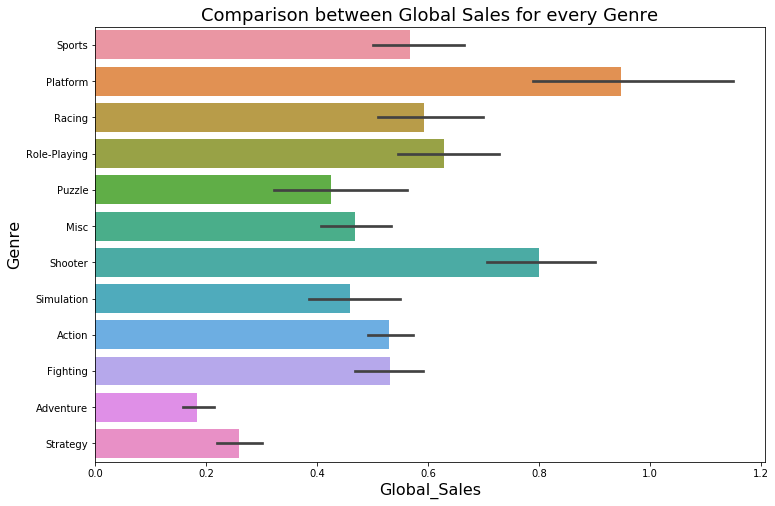

In [19]:
plt.figure(figsize=(12,8))
colors= sns.color_palette('muted')
ax = sns.barplot(data = best_genre, y = best_genre.Genre, x = best_genre.Global_Sales)
ax.set_xlabel(xlabel= 'Global_Sales', fontsize = 16)
ax.set_ylabel(ylabel= 'Genre', fontsize= 16)
ax.set_title('Comparison between Global Sales for every Genre', fontsize= 18)

12.This plot is showing the best revenue per game by year in $ millions

Text(0.5, 1.0, 'Best Revenue Per Game by Year in $ Millions')

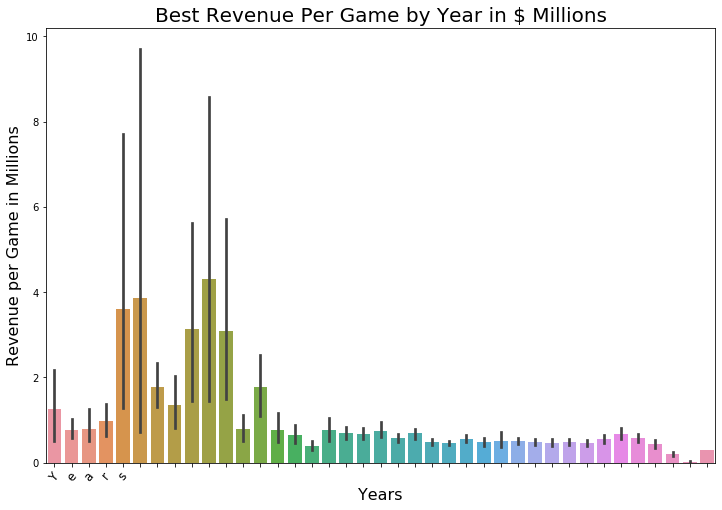

In [22]:
best_year = gamesD[['Year','Global_Sales']]
best_year.groupby('Global_Sales')
plt.figure(figsize = (12,8))


ax = sns.barplot(data = best_year,x= best_year.Year, y= best_year.Global_Sales)
ax.set_xticklabels(labels = 'Years', fontsize=12, rotation= 50)
ax.set_xlabel(xlabel= 'Years', fontsize= 16)
ax.set_ylabel(ylabel='Revenue per Game in Millions', fontsize=16)
ax.set_title(label= 'Best Revenue Per Game by Year in $ Millions' , fontsize= 20)

13.These plot shows the number of games in each platform

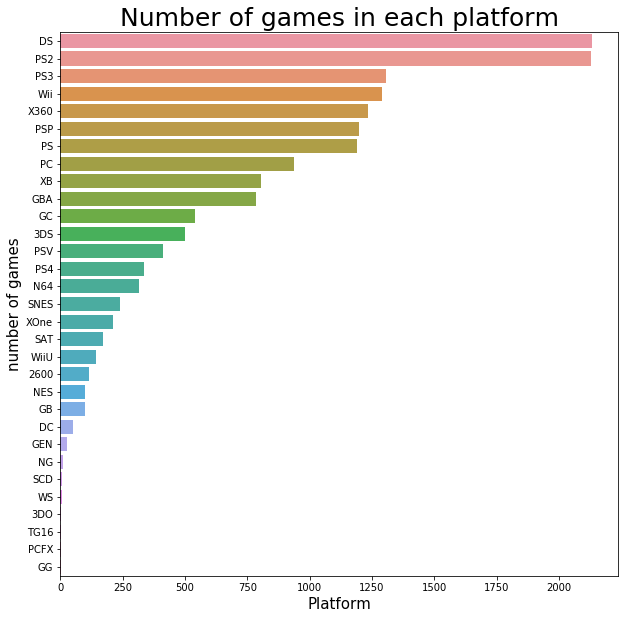

In [27]:
plat_pop = pd.crosstab(gamesD.Platform,gamesD.Genre)
plat_pop_total = plat_pop.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,10))
ax= sns.barplot(y = plat_pop_total.index, x = plat_pop_total.values)
ax.set_xlabel(xlabel = 'Platform', fontsize = 15)
ax.set_ylabel(ylabel = 'number of games', fontsize = 15)
ax.set_title(label = 'Number of games in each platform' , fontsize = 25)
plt.show()

#
THE EDA TO SHOW THE CORRELATION AND TO EXPLAIN THE MODEL CHOSSEN

Text(0.5, 1.0, 'Global Sales - NA Sales ')

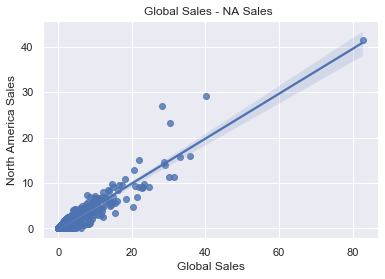

In [14]:
sns.set()
sns.regplot(gamesD['Global_Sales'],gamesD['NA_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - NA Sales ')

Text(0.5, 1.0, 'Global Sales - EU Sales ')

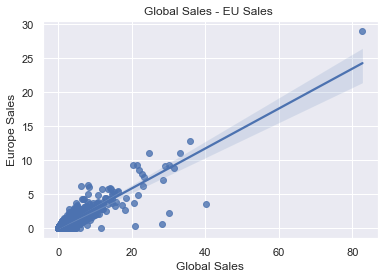

In [15]:
sns.regplot(gamesD['Global_Sales'],gamesD['EU_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Europe Sales')
plt.title('Global Sales - EU Sales ')

Text(0.5, 1.0, 'Global Sales - JP Sales ')

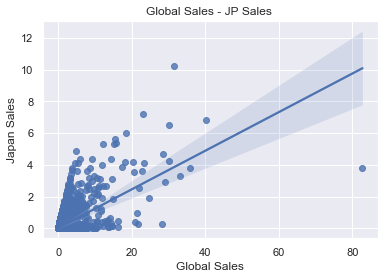

In [17]:
sns.regplot(gamesD['Global_Sales'],gamesD['JP_Sales'])
plt.xlabel('Global Sales')
plt.ylabel('Japan Sales')
plt.title('Global Sales - JP Sales ')

Text(0.5, 1.0, 'Global Sales - Others Sales ')

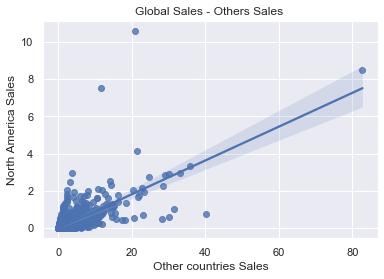

In [18]:
sns.regplot(gamesD['Global_Sales'],gamesD['Other_Sales'])
plt.xlabel('Other countries Sales')
plt.ylabel('North America Sales')
plt.title('Global Sales - Others Sales ')

(16291, 11)


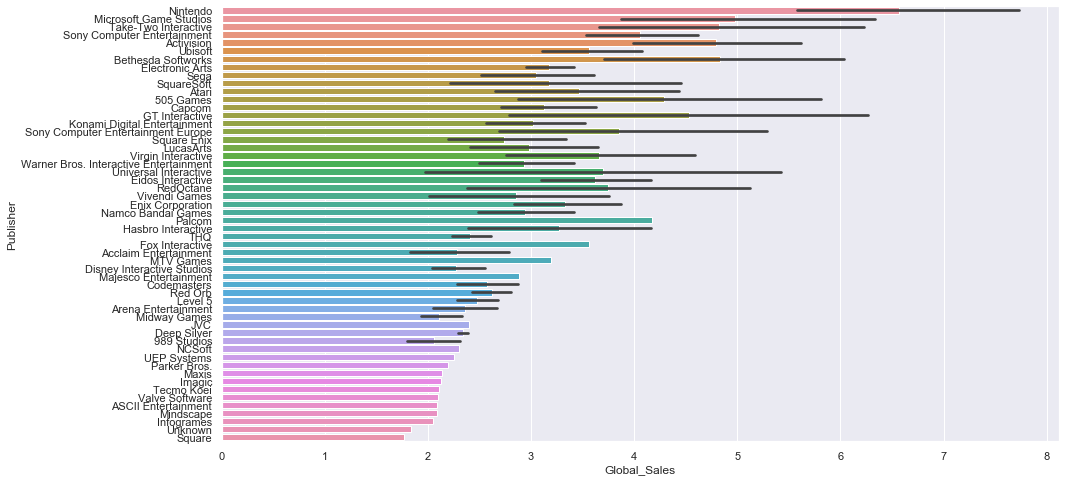

In [19]:
plt.figure(figsize=(15,8))
cop = gamesD.copy()
cop.sort_values('Global_Sales',ascending=False)
print(cop.shape)
cop1 = cop.head(1000).copy()
sns.barplot(y=cop1['Publisher'],x=cop1['Global_Sales'],orient='h')


In [20]:
#Some label encoding will be done since we have some categorical DATA
obj_cols = [col for col in cop.columns if cop[col].dtype=='object']
print('Columns that will be encoded are ='+str(obj_cols))

Columns that will be encoded are =['Name', 'Platform', 'Genre', 'Publisher']


In [21]:
#we want to drop the year column because its actually redundant#
cop.drop('Year',axis=1)

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: cop[col].nunique(), obj_cols))
d = dict(zip(obj_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Genre', 12), ('Platform', 31), ('Publisher', 576), ('Name', 11325)]

**Since we have 4 categorical data with far more than 10 entries , wont be good to OH( One hot encoding) them , label coding will be fair enough but will overfit the model , we will just skip the label encoding **

In [23]:
from sklearn.model_selection import train_test_split #Best approach to test the model
from sklearn.metrics import mean_absolute_error # mean absolute error , error = predictions - validation_y then abs for pos value
from sklearn.tree import DecisionTreeRegressor #model
features = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']#our features
X = cop[features]
y = cop.Global_Sales #target
train_X , val_X , train_y , val_y = train_test_split(X,y,test_size=0.25,random_state=1)
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [24]:
predictions =model.predict(val_X)
mea = mean_absolute_error(predictions, val_y)
print('Mean absolute error '+str(mea))

Mean absolute error 0.0399583069626428


In [26]:

df = pd.DataFrame({'Actual': val_y, 'Predicted': predictions})
df.head()


,Actual,Predicted
9172,0.14,0.140513
5906,0.30,0.308182
7003,0.23,0.240000
10503,0.10,0.097231
289,4.08,4.220000


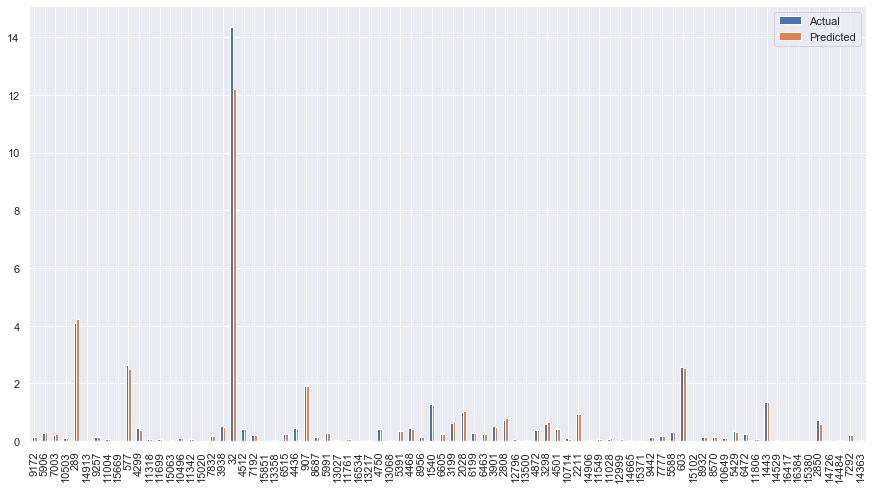

In [27]:
#bar plots showing the first 80 of  the data frames
df1 = df.head(80)
df1.plot(kind='bar',figsize=(15,8))
plt.show()

In [28]:
val_X['Global_Sales']=predictions
print(len(df.index))


4073


C:\Users\user\Documents\New folder\anaconda way\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I hope this was quite explanable to a level of understanding
its actually my first project posting after consistently trying more than one,even though its not totally explanatory
,i hope you got something
